In [18]:
"""
Created on: Tue. 9 Aug. 2022
Updated on: Tue. 16 Aug. 2022
Updated on: Tue. 23 Aug. 2022
Author: Mélina Verger
"""

# To interact with the operating system
import os

# To compute correlation
import pandas as pd
pd.set_option('display.max_columns', None)

# For data manipulation
import numpy as np

# To compute MI
from sklearn.feature_selection import mutual_info_classif

# Plotting modules
import seaborn as sns
import matplotlib.pyplot as plt

In [19]:
studentAll_num_scaled = pd.read_csv("./data/studentAll_num_scaled.csv")

In [20]:
studentAll_num_scaled

,gender,highest_education,imd_band,age_band,disability,num_of_prev_attempts,studied_credits,sum_click,weighted_score,final_result,code_module_AAA,code_module_BBB,code_module_CCC,code_module_DDD,code_module_EEE,code_module_FFF,code_module_GGG,code_presentation_2013B,code_presentation_2013J,code_presentation_2014B,code_presentation_2014J,region_East Anglian Region,region_East Midlands Region,region_Ireland,region_London Region,region_North Region,region_North Western Region,region_Scotland,region_South East Region,region_South Region,region_South West Region,region_Wales,region_West Midlands Region,region_Yorkshire Region
0,1.0,0.75,0.0,1.0,0.0,0.0,0.35,0.038653,0.824000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.75,1.0,0.5,0.0,0.0,0.05,0.059408,0.654000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.50,0.0,0.5,0.0,0.0,0.05,0.089361,0.763000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.25,0.0,0.0,0.0,0.0,0.05,0.042796,0.550000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1.0,0.50,0.0,0.5,0.0,0.0,0.05,0.101251,0.669000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19114,0.0,0.25,0.0,0.0,0.0,0.0,0.00,0.009736,0.788889,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
19115,0.0,0.50,0.0,0.0,1.0,0.0,0.00,0.019679,0.888889,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
19116,0.0,0.25,1.0,0.5,0.0,0.0,0.00,0.036954,0.881111,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
19117,0.0,0.50,1.0,0.0,1.0,0.0,0.00,0.012884,0.766667,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [21]:
# Correlation matrix
studentAll_num_scaled.corr(method="kendall")

,gender,highest_education,imd_band,age_band,disability,num_of_prev_attempts,studied_credits,sum_click,weighted_score,final_result,code_module_AAA,code_module_BBB,code_module_CCC,code_module_DDD,code_module_EEE,code_module_FFF,code_module_GGG,code_presentation_2013B,code_presentation_2013J,code_presentation_2014B,code_presentation_2014J,region_East Anglian Region,region_East Midlands Region,region_Ireland,region_London Region,region_North Region,region_North Western Region,region_Scotland,region_South East Region,region_South Region,region_South West Region,region_Wales,region_West Midlands Region,region_Yorkshire Region
gender,1.000000,0.065101,-0.062343,-0.038945,-0.046939,-0.012438,0.065253,0.187350,0.023607,-0.025584,0.026768,-0.490696,0.167747,0.065076,0.218757,0.338840,-0.225394,-0.029029,-0.034332,0.002638,0.052217,-0.023360,-0.008304,-0.010723,-0.005012,0.024958,0.029432,0.032626,-0.009772,0.020793,-0.008050,-0.032510,-0.004444,-0.008131
highest_education,0.065101,1.000000,-0.082379,0.061098,-0.078164,-0.033068,0.064078,0.076676,0.093302,0.032187,0.063221,-0.051493,0.123822,0.048817,0.033515,-0.014189,-0.160544,-0.005598,-0.033308,-0.004021,0.039372,-0.026336,-0.029552,-0.020813,0.003192,-0.011454,-0.038076,0.168754,-0.009472,-0.001320,-0.020588,-0.001627,-0.029992,-0.020822
imd_band,-0.062343,-0.082379,1.000000,-0.050763,0.053788,0.026359,0.018699,-0.063076,-0.083154,-0.036915,-0.042947,0.066225,-0.037837,-0.034759,-0.043618,0.011384,0.033048,0.019478,-0.004999,0.010252,-0.018941,-0.095841,-0.007872,0.001492,0.134201,0.062899,0.102881,-0.042204,-0.073248,-0.155565,-0.013479,0.016958,0.062022,0.055080
age_band,-0.038945,0.061098,-0.050763,1.000000,-0.028568,0.000168,-0.086217,0.108114,0.065592,0.020658,0.091893,0.048571,-0.003615,-0.044725,-0.035462,-0.064403,0.057807,-0.007615,-0.002136,-0.012446,0.018675,-0.001645,-0.007122,-0.012253,0.034464,-0.036232,-0.012674,0.037807,0.015989,0.011781,-0.000310,0.007909,-0.044705,-0.022303
disability,-0.046939,-0.078164,0.053788,-0.028568,1.000000,0.051509,0.006829,-0.032524,-0.030787,-0.020298,-0.024151,0.000146,-0.019956,0.019186,-0.033169,-0.012397,0.057693,0.001009,-0.000908,0.008965,-0.007747,0.032650,0.018996,-0.032179,-0.011836,-0.031193,0.008502,0.009570,0.004324,0.016501,0.019252,-0.023291,-0.004966,-0.039604
num_of_prev_attempts,-0.012438,-0.033068,0.026359,0.000168,0.051509,1.000000,0.180217,-0.082464,-0.078535,-0.066822,-0.040182,0.044702,-0.075728,0.086378,-0.067474,0.054254,-0.086041,0.101305,-0.037662,-0.005742,-0.035744,-0.006479,-0.004139,0.007461,0.005776,0.006513,-0.010070,0.001413,0.005704,-0.023927,-0.006864,0.024788,0.016993,-0.008474
studied_credits,0.065253,0.064078,0.018699,-0.086217,0.006829,0.180217,1.000000,0.074207,-0.079129,-0.011054,0.026574,0.119396,-0.038960,0.096108,-0.104887,0.205367,-0.462877,0.134991,-0.012035,-0.060157,-0.037895,-0.022122,-0.002502,0.020486,0.009906,-0.000073,-0.009944,-0.003888,-0.005471,-0.004820,0.000625,0.035854,-0.002301,-0.004352
sum_click,0.187350,0.076676,-0.063076,0.108114,-0.032524,-0.082464,0.074207,1.000000,0.222758,0.207448,0.028678,-0.252083,0.032575,-0.052847,0.080268,0.355724,-0.188492,0.050138,-0.032742,-0.068644,0.053294,-0.000503,-0.002102,-0.007138,-0.003273,0.005996,-0.000035,0.037625,0.008900,0.017883,-0.001180,-0.045809,-0.014548,-0.006259
weighted_score,0.023607,0.093302,-0.083154,0.065592,-0.030787,-0.078535,-0.079129,0.222758,1.000000,0.038755,-0.039593,-0.061255,-0.033116,-0.160515,0.134530,0.074071,0.121034,-0.029483,0.005026,0.009826,0.008900,0.008202,0.008058,-0.027886,-0.024289,-0.007274,-0.015111,0.018942,0.032923,0.026672,-0.004013,-0.022670,-0.006226,-0.002673
final_result,-0.025584,0.032187,-0.036915,0.020658,-0.020298,-0.066822,-0.011054,0.207448,0.038755,1.000000,0.077910,0.015869,-0.053358,-0.007416,0.030304,-0.010166,-0.015240,-0.022751,0.033045,-0.052943,0.032152,0.007963,0.008895,0.014124,-0.021142,-0.005661,-0.021318,0.000165,0.015032,0.024489,0.005456,-0.026487,0.005174,-0.005413


In [22]:
if not os.path.exists("figures"):
    os.mkdir("figures")

else:
    print("The folder 'figures' already exists.")

The folder 'figures' already exists.


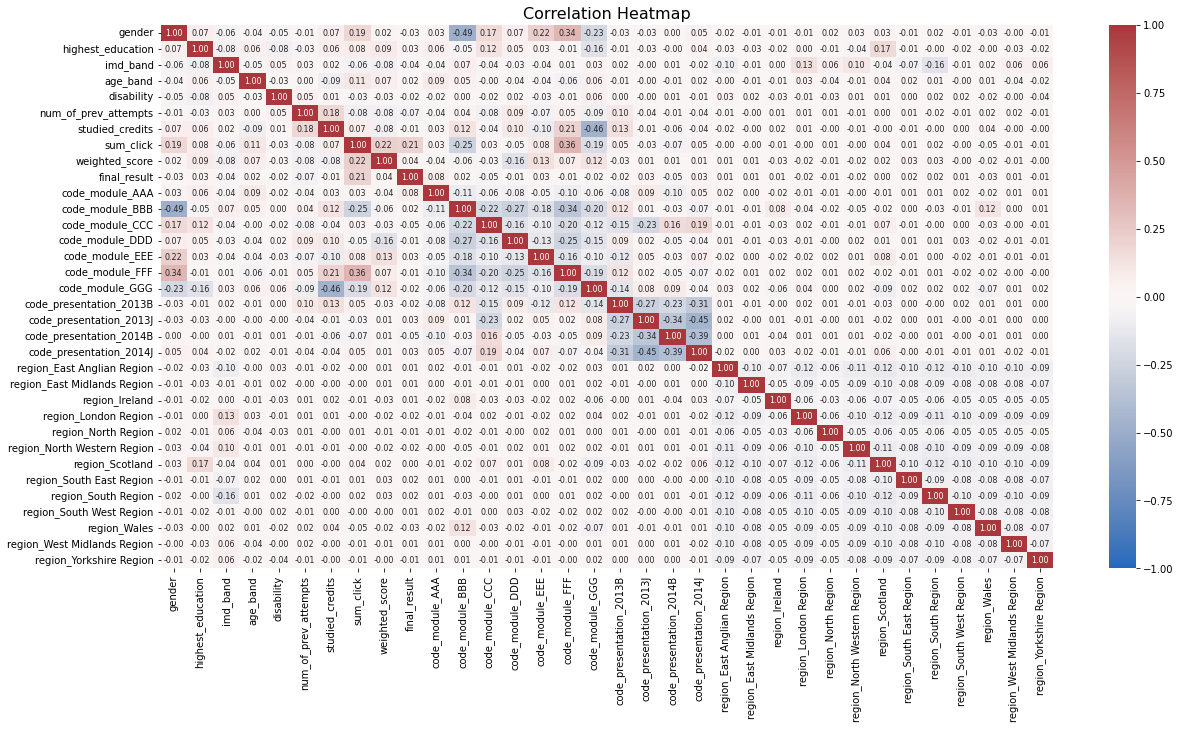

In [23]:
plt.figure(figsize=(20, 10), facecolor="white")

heatmap = sns.heatmap(
    studentAll_num_scaled.corr(method="kendall"),  
    vmin=-1, vmax=1, # because correlation coefficient
    annot=True, 
    annot_kws={"fontsize":8},
    fmt=".2f",
    cmap="vlag"
    )

heatmap.set_title('Correlation Heatmap', fontsize=16)

plt.savefig('./figures/stAll_correlation_heatmap_kendall.png')

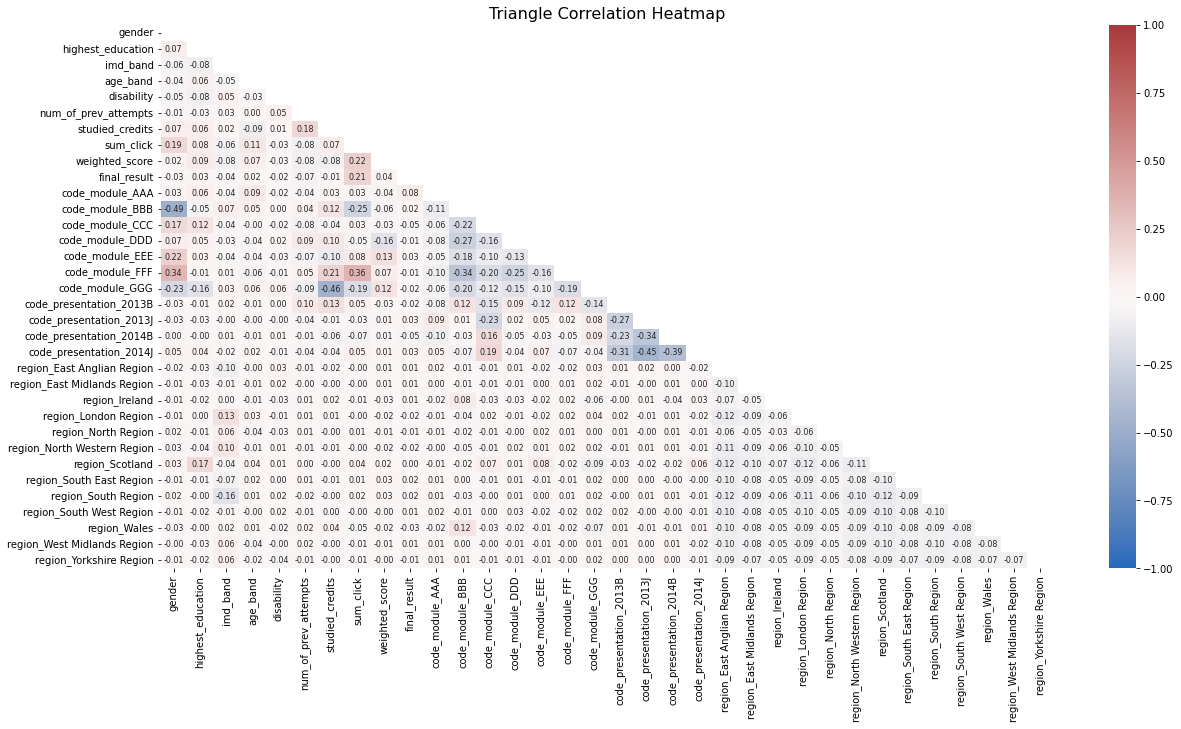

In [24]:
plt.figure(figsize=(20, 10), facecolor="white")

# Define the mask to set the values in the upper triangle to True
mask = np.triu(np.ones_like(studentAll_num_scaled.corr(method="kendall"), dtype=bool))

heatmap = sns.heatmap(
    studentAll_num_scaled.corr(method="kendall"),  
    mask=mask,
    vmin=-1, vmax=1, # because correlation coefficient
    annot=True, 
    annot_kws={"fontsize":8},
    fmt=".2f",
    cmap="vlag"
    )

heatmap.set_title('Triangle Correlation Heatmap', fontsize=16)

plt.savefig('./figures/stAll_triangle_correlation_heatmap_kendall.png')

## Elimination

### code_presentation

In [25]:
col = list()
for column in studentAll_num_scaled.columns:
    if "code_presentation" in column:
        col.append(column)

studentAll_num_scaled_without_codepresentation = studentAll_num_scaled.drop(columns=col)

In [26]:
studentAll_num_scaled_without_codepresentation

,gender,highest_education,imd_band,age_band,disability,num_of_prev_attempts,studied_credits,sum_click,weighted_score,final_result,code_module_AAA,code_module_BBB,code_module_CCC,code_module_DDD,code_module_EEE,code_module_FFF,code_module_GGG,region_East Anglian Region,region_East Midlands Region,region_Ireland,region_London Region,region_North Region,region_North Western Region,region_Scotland,region_South East Region,region_South Region,region_South West Region,region_Wales,region_West Midlands Region,region_Yorkshire Region
0,1.0,0.75,0.0,1.0,0.0,0.0,0.35,0.038653,0.824000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.75,1.0,0.5,0.0,0.0,0.05,0.059408,0.654000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.50,0.0,0.5,0.0,0.0,0.05,0.089361,0.763000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.25,0.0,0.0,0.0,0.0,0.05,0.042796,0.550000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1.0,0.50,0.0,0.5,0.0,0.0,0.05,0.101251,0.669000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19114,0.0,0.25,0.0,0.0,0.0,0.0,0.00,0.009736,0.788889,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
19115,0.0,0.50,0.0,0.0,1.0,0.0,0.00,0.019679,0.888889,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
19116,0.0,0.25,1.0,0.5,0.0,0.0,0.00,0.036954,0.881111,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
19117,0.0,0.50,1.0,0.0,1.0,0.0,0.00,0.012884,0.766667,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


Text(0.5, 1.0, 'Triangle Correlation Heatmap')

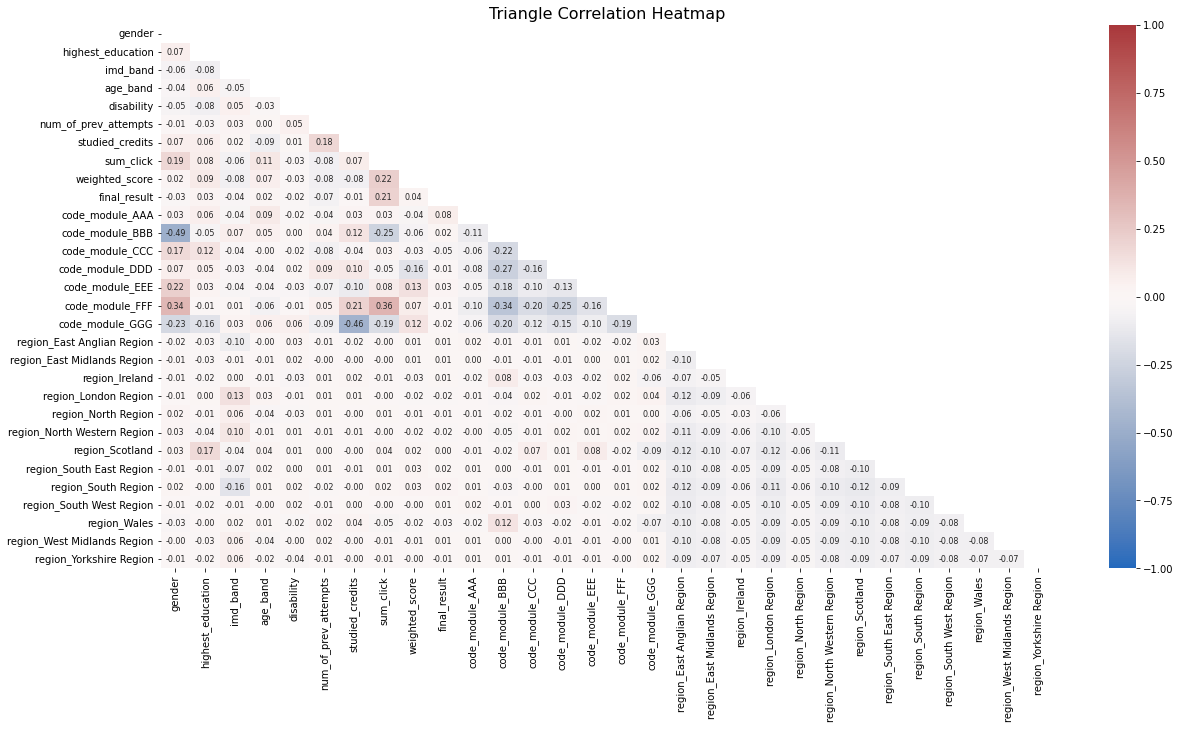

In [27]:
plt.figure(figsize=(20, 10), facecolor="white")

# Define the mask to set the values in the upper triangle to True
mask = np.triu(np.ones_like(studentAll_num_scaled_without_codepresentation.corr(method="kendall"), dtype=bool))

heatmap = sns.heatmap(
    studentAll_num_scaled_without_codepresentation.corr(method="kendall"),  
    mask=mask,
    vmin=-1, vmax=1,
    annot=True, 
    annot_kws={"fontsize":8},
    fmt=".2f",
    cmap="vlag"
    )

heatmap.set_title('Triangle Correlation Heatmap', fontsize=16)

### region

In [28]:
col = list()
for column in studentAll_num_scaled_without_codepresentation.columns:
    if "region" in column:
        col.append(column)

studentAll_num_scaled_without_codepresentation_region = studentAll_num_scaled_without_codepresentation.drop(columns=col)

Text(0.5, 1.0, 'Triangle Correlation Heatmap')

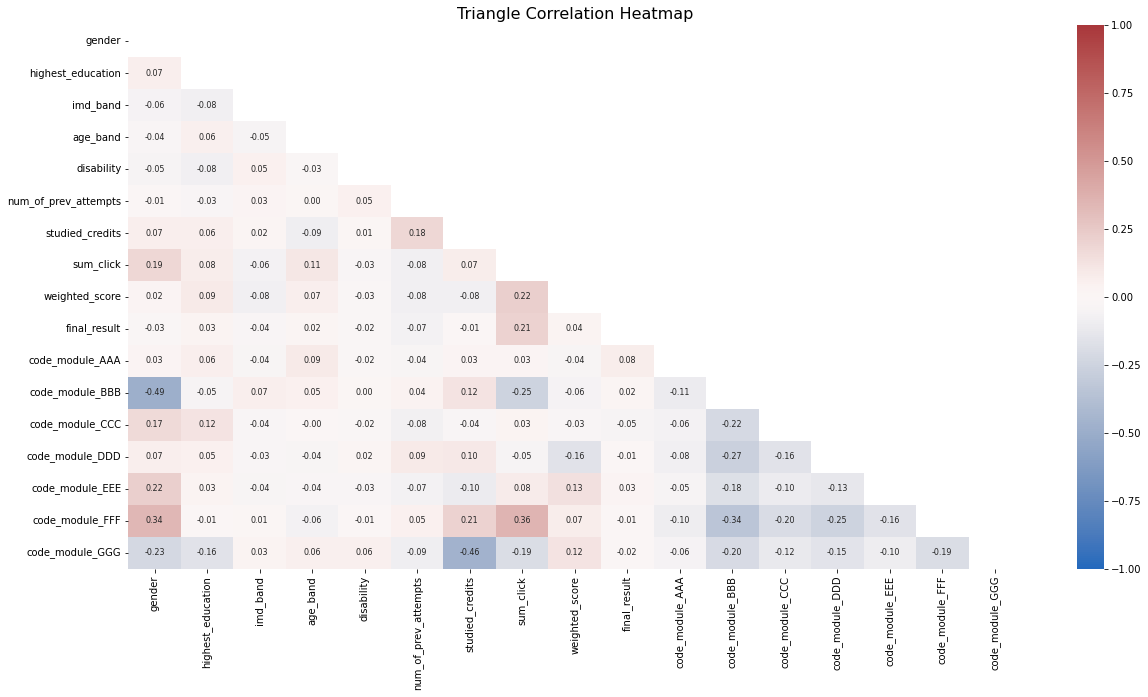

In [29]:
plt.figure(figsize=(20, 10), facecolor="white")

# Define the mask to set the values in the upper triangle to True
mask = np.triu(np.ones_like(studentAll_num_scaled_without_codepresentation_region.corr(method="kendall"), dtype=bool))

heatmap = sns.heatmap(
    studentAll_num_scaled_without_codepresentation_region.corr(method="kendall"),  
    mask=mask,
    vmin=-1, vmax=1,
    annot=True, 
    annot_kws={"fontsize":8},
    fmt=".2f",
    cmap="vlag"
    )

heatmap.set_title('Triangle Correlation Heatmap', fontsize=16)

## (Optional) Pairwise relationships and other correlation plots

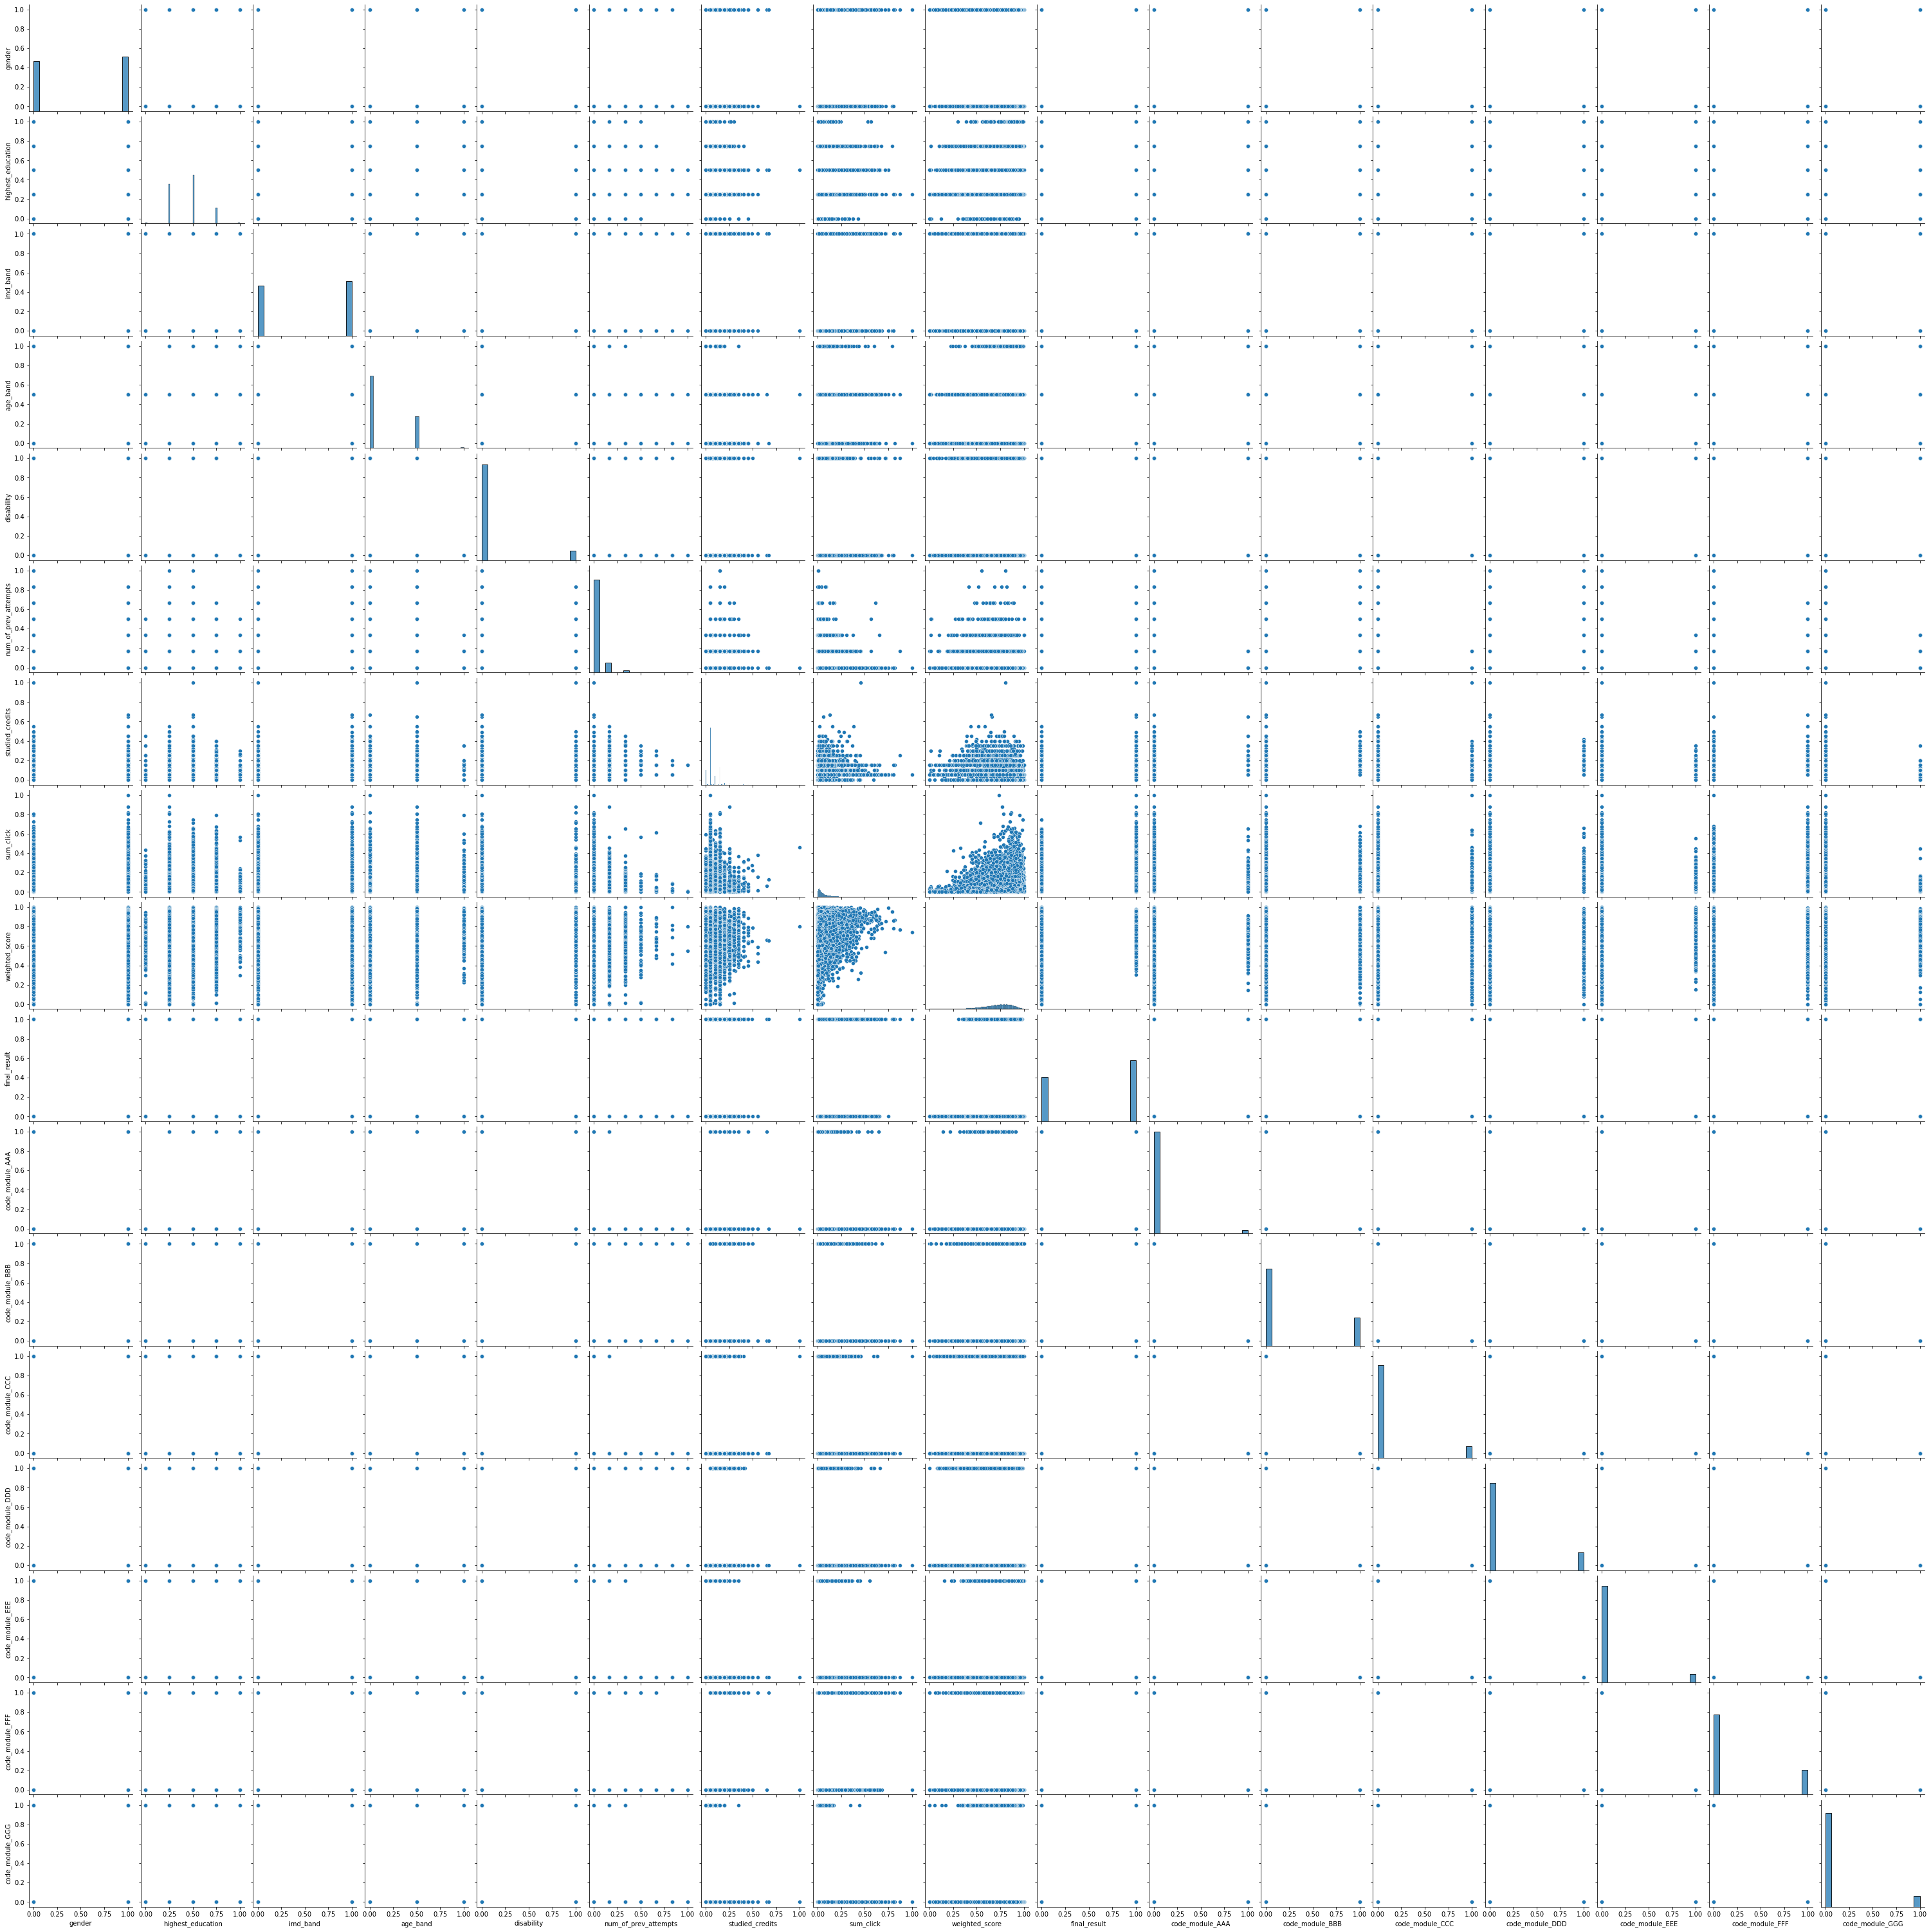

In [30]:
sns.pairplot(studentAll_num_scaled_without_codepresentation_region)

<Figure size 360x360 with 0 Axes>

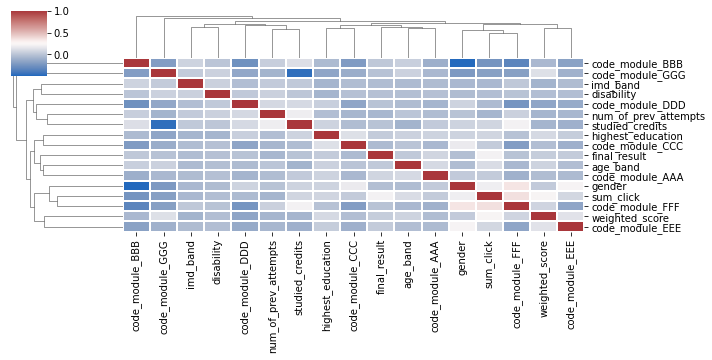

In [31]:
plt.figure(figsize=(5,5))
sns.clustermap(studentAll_num_scaled_without_codepresentation_region.corr(method="kendall"), 
           cmap="vlag",
           linewidths=0.1,
           figsize=(10,5))

<AxesSubplot:>

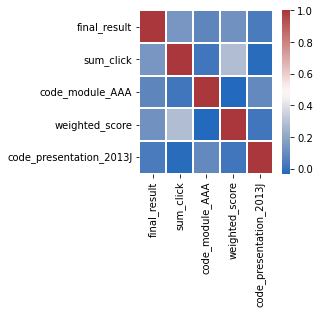

In [32]:
k = 5 #number of variables for heatmap
corrmat = studentAll_num_scaled.corr(method="kendall")
cols = corrmat.nlargest(k, 'final_result')['final_result'].index
cm = np.corrcoef(studentAll_num_scaled[cols].values.T)
f, ax = plt.subplots(figsize=(3, 3))
sns.heatmap(cm, ax=ax, cmap="vlag", linewidths=0.1, yticklabels=cols.values, xticklabels=cols.values)

## Mutual information

In [33]:
def make_mi_scores(X, y, label):
    mi_scores = mutual_info_classif(X, y)
    mi_scores = pd.Series(mi_scores, name="MI scores " + label, index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores

# MI by final_result
X_mi_finalresult = studentAll_num_scaled_without_codepresentation_region.drop(columns=["final_result"])
y_mi_finalresult = studentAll_num_scaled_without_codepresentation_region["final_result"].astype(int)
mi_scores_finalresult = make_mi_scores(X_mi_finalresult, y_mi_finalresult, "final_result")

# MI by gender
X_mi_gender = studentAll_num_scaled_without_codepresentation_region.drop(columns=["final_result", "gender"])
y_mi_gender = studentAll_num_scaled_without_codepresentation_region["gender"].astype(int)
mi_scores_gender = make_mi_scores(X_mi_gender, y_mi_gender, "gender")

# MI by imd_band
X_mi_imdband = studentAll_num_scaled_without_codepresentation_region.drop(columns=["final_result", "imd_band"])
y_mi_imdband = studentAll_num_scaled_without_codepresentation_region["imd_band"].astype(int)
mi_scores_imdband = make_mi_scores(X_mi_imdband, y_mi_imdband, "imd_band")

<AxesSubplot:>

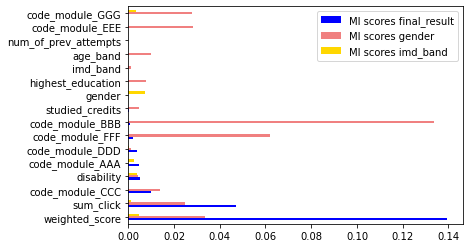

In [40]:
pd.DataFrame([mi_scores_finalresult, mi_scores_gender, mi_scores_imdband]).T.plot.barh(color={"MI scores final_result": "blue", 
                                                                                              "MI scores gender": "lightcoral",
                                                                                              "MI scores imd_band": "gold"})

<AxesSubplot:>

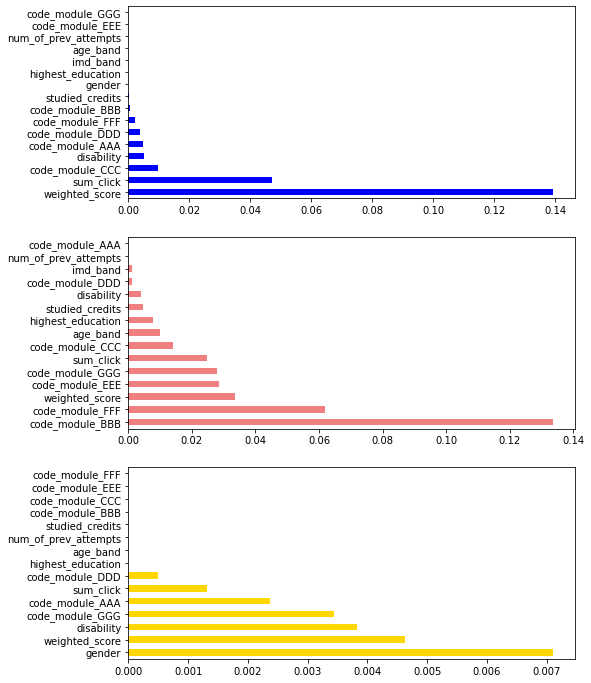

In [37]:
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(8, 12))
mi_scores_finalresult.plot(ax=axes[0], kind="barh", color="blue")
mi_scores_gender.plot(ax=axes[1], kind="barh", color="lightcoral")
mi_scores_imdband.plot(ax=axes[2], kind="barh", color="gold")